# 📈 Week 12 Trading Strategy: Complete Backtesting System

---

## 🎯 Strategy Overview

**The Ultimate Integration - Weeks 1-12 Combined:**
- Foundation (Returns, Volatility, Correlation)
- Statistics (Hypothesis Testing, Distributions)
- Time Series (GARCH, ARIMA, Cointegration)
- ML Models (Regression, Classification, Trees)
- Portfolio Optimization (MPT, Risk Parity)
- Factor Models (CAPM, Fama-French)
- Instance-Based (KNN, SVR)
- Unsupervised (PCA, Clustering)
- Feature Engineering (Technical, SHAP)
- **NEW:** Complete Backtesting Framework
- **NEW:** Transaction Cost Analysis
- **NEW:** Walk-Forward Optimization
- **NEW:** Risk Management & Drawdown Analysis

**This is the PROFESSIONAL trading system!**

---

In [1]:
# ============================================================
# CONFIGURATION
# ============================================================
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
BENCHMARK = 'SPY'
LOOKBACK_DAYS = 252 * 3
TRANSACTION_COST = 0.001  # 10 bps per trade
RISK_FREE_RATE = 0.05
INITIAL_CAPITAL = 100000
MAX_POSITION_SIZE = 0.20  # Max 20% per stock

print("=" * 70)
print("📊 WEEK 12: COMPLETE BACKTESTING SYSTEM")
print("=" * 70)
print(f"\n🎯 Analyzing: {TICKERS}")
print(f"💰 Initial Capital: ${INITIAL_CAPITAL:,}")
print(f"📊 Transaction Cost: {TRANSACTION_COST:.2%}")

📊 WEEK 12: COMPLETE BACKTESTING SYSTEM

🎯 Analyzing: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
💰 Initial Capital: $100,000
📊 Transaction Cost: 0.10%


In [2]:
# ============================================================
# DATA LOADING & IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

# Fetch data
all_tickers = TICKERS + [BENCHMARK]
end_date = datetime.now()
start_date = end_date - timedelta(days=int(LOOKBACK_DAYS * 1.5))

print("\n📥 Downloading market data...")
data = yf.download(all_tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)
prices = data['Close'].dropna().tail(LOOKBACK_DAYS)
volumes = data['Volume'].dropna().tail(LOOKBACK_DAYS)
high = data['High'].dropna().tail(LOOKBACK_DAYS)
low = data['Low'].dropna().tail(LOOKBACK_DAYS)
returns = prices.pct_change().dropna()

print(f"✅ Loaded {len(prices)} trading days")


📥 Downloading market data...
✅ Loaded 756 trading days


---

## 📊 Section 1: Complete Feature Pipeline (Weeks 1-11 Integration)

**Integrating ALL previous concepts:**
- Technical indicators (Week 1-3)
- Statistical features (Week 2)
- Volatility features (Week 7)
- Factor exposures (Week 6)
- PCA factors (Week 9)

In [3]:
# ============================================================
# COMPLETE FEATURE ENGINEERING PIPELINE
# ============================================================

def create_complete_features(prices, returns, volumes, high, low, ticker, benchmark, all_tickers):
    """Create complete feature set integrating ALL weeks."""
    
    df = pd.DataFrame(index=prices.index[50:])
    close = prices[ticker]
    ret = returns[ticker]
    vol = volumes[ticker]
    hi = high[ticker]
    lo = low[ticker]
    bench_ret = returns[benchmark]
    
    # === WEEK 1-3: BASIC FEATURES ===
    df['ret_1d'] = ret.shift(1)
    df['ret_5d'] = ret.rolling(5).sum().shift(1)
    df['ret_20d'] = ret.rolling(20).sum().shift(1)
    
    # Moving averages
    df['ma_10_ratio'] = (close / close.rolling(10).mean() - 1).shift(1)
    df['ma_50_ratio'] = (close / close.rolling(50).mean() - 1).shift(1)
    
    # === WEEK 2: STATISTICAL FEATURES ===
    df['ret_zscore'] = ((ret - ret.rolling(20).mean()) / ret.rolling(20).std()).shift(1)
    df['vol_zscore'] = ((ret.rolling(5).std() - ret.rolling(60).std().mean()) / ret.rolling(60).std().std()).shift(1)
    
    # === WEEK 7: VOLATILITY FEATURES ===
    df['realized_vol'] = ret.rolling(20).std().shift(1) * np.sqrt(252)
    df['vol_change'] = (ret.rolling(5).std() / ret.rolling(20).std()).shift(1)
    
    # ATR
    tr = pd.concat([hi - lo, abs(hi - close.shift(1)), abs(lo - close.shift(1))], axis=1).max(axis=1)
    df['atr_ratio'] = (tr.rolling(14).mean() / close).shift(1)
    
    # === WEEK 3: TECHNICAL INDICATORS ===
    # RSI
    delta = close.diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
    df['rsi'] = (100 - (100 / (1 + gain / loss))).shift(1)
    
    # MACD
    ema12 = close.ewm(span=12).mean()
    ema26 = close.ewm(span=26).mean()
    df['macd'] = ((ema12 - ema26) / close).shift(1)
    
    # Bollinger Bands
    ma20 = close.rolling(20).mean()
    std20 = close.rolling(20).std()
    df['bb_position'] = ((close - ma20) / (2 * std20)).shift(1)
    
    # === WEEK 6: FACTOR FEATURES ===
    # Rolling beta
    cov = ret.rolling(60).cov(bench_ret)
    var = bench_ret.rolling(60).var()
    df['beta'] = (cov / var).shift(1)
    
    # Relative strength
    df['rel_strength'] = (ret.rolling(20).sum() - bench_ret.rolling(20).sum()).shift(1)
    
    # === WEEK 8: CROSS-ASSET FEATURES ===
    df['corr_bench'] = ret.rolling(20).corr(bench_ret).shift(1)
    
    # === VOLUME FEATURES ===
    df['volume_ratio'] = (vol / vol.rolling(20).mean()).shift(1)
    
    # Target: Next day return (for ML model)
    df['target'] = ret
    
    return df.dropna()

# Create features for all tickers
feature_dfs = {}
for ticker in TICKERS:
    feature_dfs[ticker] = create_complete_features(
        prices, returns, volumes, high, low, ticker, BENCHMARK, TICKERS
    )
    
print(f"✅ Created {len(feature_dfs[TICKERS[0]].columns)-1} integrated features per ticker")

✅ Created 17 integrated features per ticker


---

## 📊 Section 2: Walk-Forward Backtesting (Week 12 Concept)

**Walk-Forward Optimization:**
1. Train model on historical data
2. Generate signals for next period
3. Roll forward and repeat
4. No look-ahead bias!

**This is how professionals backtest!**

In [4]:
# ============================================================
# WALK-FORWARD BACKTESTING ENGINE
# ============================================================

class WalkForwardBacktest:
    def __init__(self, train_window=252, test_window=21, transaction_cost=0.001):
        self.train_window = train_window
        self.test_window = test_window
        self.transaction_cost = transaction_cost
        
    def generate_signals(self, features, train_start, train_end, test_start, test_end):
        """Train model and generate signals for test period."""
        
        feature_cols = [c for c in features.columns if c != 'target']
        
        # Training data
        train_data = features.iloc[train_start:train_end]
        X_train = train_data[feature_cols].values
        y_train = train_data['target'].values
        
        # Test data
        test_data = features.iloc[test_start:test_end]
        X_test = test_data[feature_cols].values
        
        # Scale
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train model
        model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        predictions = model.predict(X_test_scaled)
        
        # Convert to signals (-1, 0, 1)
        signals = np.zeros(len(predictions))
        signals[predictions > 0.001] = 1
        signals[predictions < -0.001] = -1
        
        return pd.Series(signals, index=test_data.index)
    
    def run_backtest(self, features, returns):
        """Run complete walk-forward backtest."""
        
        n = len(features)
        all_signals = pd.Series(0, index=features.index)
        
        # Walk forward
        i = self.train_window
        while i + self.test_window <= n:
            train_start = i - self.train_window
            train_end = i
            test_start = i
            test_end = min(i + self.test_window, n)
            
            signals = self.generate_signals(
                features, train_start, train_end, test_start, test_end
            )
            all_signals.iloc[test_start:test_end] = signals.values
            
            i += self.test_window
        
        # Calculate returns
        aligned_returns = returns.loc[all_signals.index]
        
        # Signal changes for transaction costs
        signal_changes = (all_signals != all_signals.shift(1)).astype(int)
        
        # Strategy returns (with transaction costs)
        strategy_returns = aligned_returns * all_signals.shift(1) - self.transaction_cost * signal_changes
        
        return {
            'signals': all_signals,
            'strategy_returns': strategy_returns,
            'benchmark_returns': aligned_returns
        }

# Run backtest for each ticker
print("📊 WALK-FORWARD BACKTESTING")
print("=" * 80)

backtest = WalkForwardBacktest(
    train_window=252, 
    test_window=21, 
    transaction_cost=TRANSACTION_COST
)

backtest_results = {}
for ticker in TICKERS:
    result = backtest.run_backtest(feature_dfs[ticker], returns[ticker])
    backtest_results[ticker] = result
    
print(f"✅ Completed walk-forward backtest for {len(TICKERS)} tickers")

📊 WALK-FORWARD BACKTESTING
✅ Completed walk-forward backtest for 5 tickers


In [5]:
# ============================================================
# PERFORMANCE METRICS
# ============================================================

def calculate_metrics(returns, rf_rate=0.05):
    """Calculate comprehensive performance metrics."""
    
    returns = returns.dropna()
    
    # Basic metrics
    total_return = (1 + returns).prod() - 1
    annual_return = (1 + total_return) ** (252 / len(returns)) - 1
    annual_vol = returns.std() * np.sqrt(252)
    sharpe = (annual_return - rf_rate) / annual_vol if annual_vol > 0 else 0
    
    # Drawdown
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    # Sortino (downside deviation)
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std() * np.sqrt(252)
    sortino = (annual_return - rf_rate) / downside_std if downside_std > 0 else 0
    
    # Win rate
    win_rate = (returns > 0).sum() / len(returns)
    
    # Profit factor
    gross_profit = returns[returns > 0].sum()
    gross_loss = abs(returns[returns < 0].sum())
    profit_factor = gross_profit / gross_loss if gross_loss > 0 else np.inf
    
    # Calmar ratio
    calmar = annual_return / abs(max_drawdown) if max_drawdown != 0 else 0
    
    return {
        'total_return': total_return,
        'annual_return': annual_return,
        'annual_vol': annual_vol,
        'sharpe': sharpe,
        'sortino': sortino,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate,
        'profit_factor': profit_factor,
        'calmar': calmar
    }

# Calculate metrics for each ticker
print("\n📊 PERFORMANCE METRICS")
print("=" * 100)

all_metrics = {}
print(f"\n{'Ticker':<10} {'Total Ret':>12} {'Annual Ret':>12} {'Sharpe':>10} {'Max DD':>12} {'Win Rate':>10}")
print("-" * 100)

for ticker in TICKERS:
    strategy_ret = backtest_results[ticker]['strategy_returns']
    metrics = calculate_metrics(strategy_ret, RISK_FREE_RATE)
    all_metrics[ticker] = metrics
    
    print(f"{ticker:<10} {metrics['total_return']:>11.2%} {metrics['annual_return']:>11.2%} {metrics['sharpe']:>9.2f} {metrics['max_drawdown']:>11.2%} {metrics['win_rate']:>9.2%}")

# Benchmark
bench_metrics = calculate_metrics(returns[BENCHMARK].loc[backtest_results[TICKERS[0]]['strategy_returns'].index], RISK_FREE_RATE)
print(f"{'SPY (BH)':<10} {bench_metrics['total_return']:>11.2%} {bench_metrics['annual_return']:>11.2%} {bench_metrics['sharpe']:>9.2f} {bench_metrics['max_drawdown']:>11.2%} {bench_metrics['win_rate']:>9.2%}")


📊 PERFORMANCE METRICS

Ticker        Total Ret   Annual Ret     Sharpe       Max DD   Win Rate
----------------------------------------------------------------------------------------------------
AAPL           -45.14%     -19.59%     -1.43     -46.11%    21.90%
MSFT            -1.19%      -0.43%     -0.33     -25.16%    24.50%
GOOGL           17.38%       5.99%      0.04     -29.30%    27.81%
AMZN            14.12%       4.91%     -0.00     -43.43%    27.67%
META            17.27%       5.95%      0.04     -22.79%    27.09%
SPY (BH)        73.28%      22.06%      1.12     -18.76%    57.55%


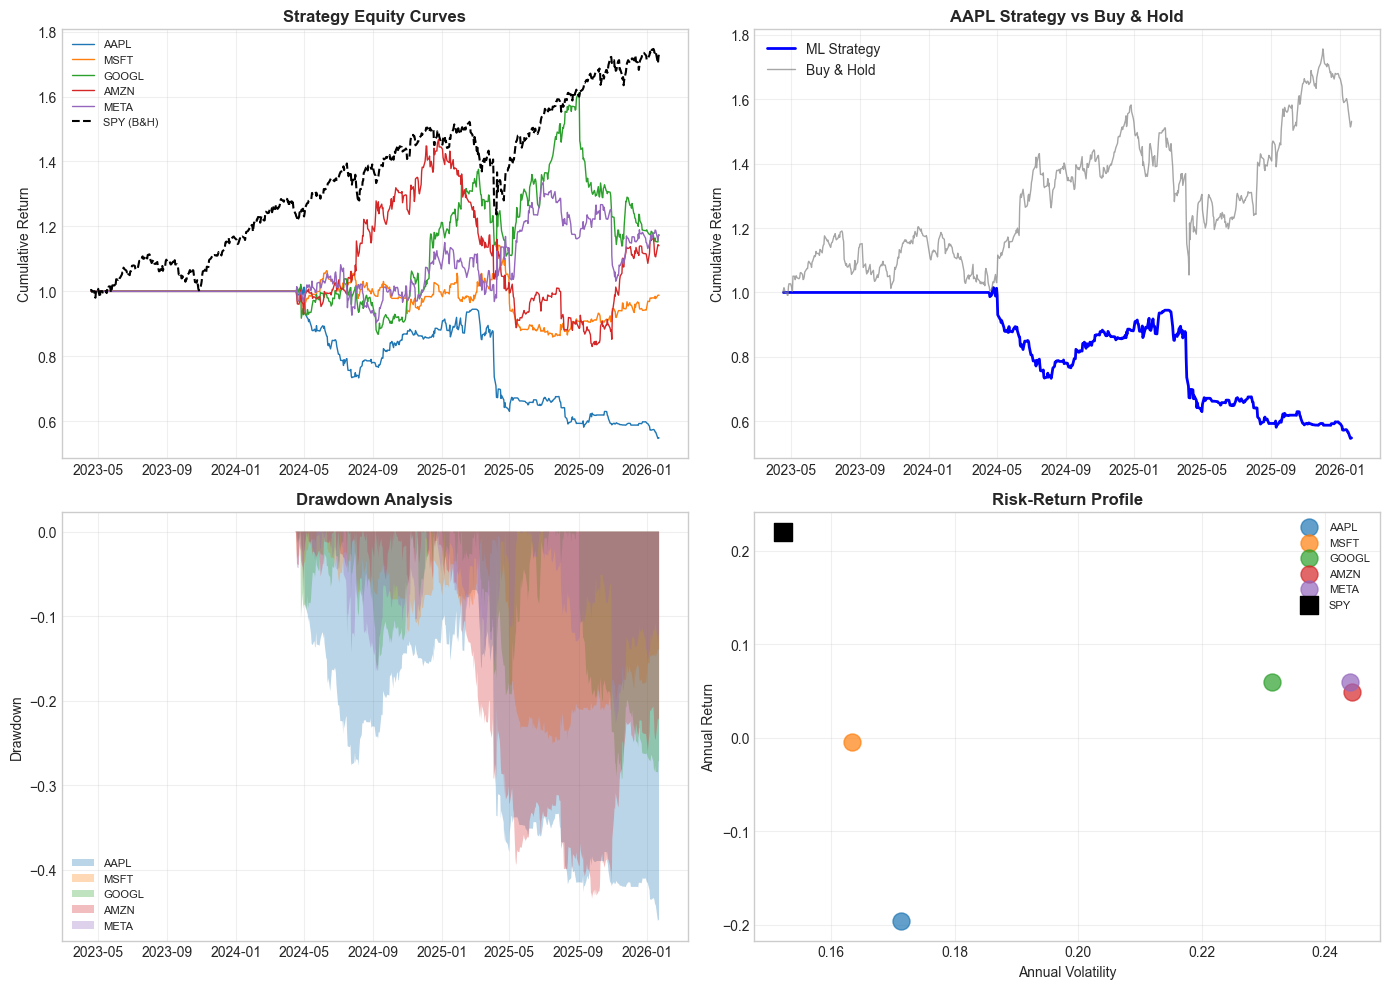

In [6]:
# ============================================================
# EQUITY CURVES VISUALIZATION
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Individual Equity Curves
ax1 = axes[0, 0]
for ticker in TICKERS:
    equity = (1 + backtest_results[ticker]['strategy_returns']).cumprod()
    ax1.plot(equity, label=ticker, linewidth=1)

# Benchmark
bench_equity = (1 + returns[BENCHMARK].loc[backtest_results[TICKERS[0]]['strategy_returns'].index]).cumprod()
ax1.plot(bench_equity, 'k--', label='SPY (B&H)', linewidth=1.5)

ax1.set_title('Strategy Equity Curves', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cumulative Return')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Strategy vs Benchmark (First Ticker)
ax2 = axes[0, 1]
ticker = TICKERS[0]
strategy_equity = (1 + backtest_results[ticker]['strategy_returns']).cumprod()
bh_equity = (1 + backtest_results[ticker]['benchmark_returns']).cumprod()
ax2.plot(strategy_equity, 'b-', label='ML Strategy', linewidth=2)
ax2.plot(bh_equity, 'gray', label='Buy & Hold', linewidth=1, alpha=0.7)
ax2.set_title(f'{ticker} Strategy vs Buy & Hold', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Return')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Drawdown
ax3 = axes[1, 0]
for ticker in TICKERS:
    equity = (1 + backtest_results[ticker]['strategy_returns']).cumprod()
    drawdown = (equity - equity.cummax()) / equity.cummax()
    ax3.fill_between(drawdown.index, 0, drawdown, alpha=0.3, label=ticker)
ax3.set_title('Drawdown Analysis', fontsize=12, fontweight='bold')
ax3.set_ylabel('Drawdown')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)

# 4. Risk-Return Scatter
ax4 = axes[1, 1]
for ticker in TICKERS:
    ax4.scatter(all_metrics[ticker]['annual_vol'], all_metrics[ticker]['annual_return'], 
               s=150, label=ticker, alpha=0.7)
ax4.scatter(bench_metrics['annual_vol'], bench_metrics['annual_return'], 
           s=150, marker='s', label='SPY', color='black')
ax4.set_xlabel('Annual Volatility')
ax4.set_ylabel('Annual Return')
ax4.set_title('Risk-Return Profile', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 📊 Section 3: Portfolio Construction (Week 12 Concept)

**Combining individual strategies into portfolio:**
- Equal weight baseline
- Risk parity weighting
- Signal-based dynamic allocation
- Position sizing with risk limits

In [7]:
# ============================================================
# PORTFOLIO CONSTRUCTION
# ============================================================

def construct_portfolio(backtest_results, tickers, max_position=0.20):
    """Construct portfolio from individual strategies."""
    
    # Align all signals
    common_index = backtest_results[tickers[0]]['signals'].index
    for ticker in tickers[1:]:
        common_index = common_index.intersection(backtest_results[ticker]['signals'].index)
    
    # Equal weight
    portfolio_returns_eq = pd.Series(0, index=common_index, dtype=float)
    
    # Signal-weighted
    portfolio_returns_signal = pd.Series(0, index=common_index, dtype=float)
    
    for ticker in tickers:
        signals = backtest_results[ticker]['signals'].loc[common_index]
        strat_returns = backtest_results[ticker]['strategy_returns'].loc[common_index]
        
        # Equal weight (1/N)
        portfolio_returns_eq += strat_returns / len(tickers)
        
        # Signal-weighted (long only for simplicity)
        weight = np.clip(signals.shift(1).fillna(0) * max_position, -max_position, max_position)
        portfolio_returns_signal += backtest_results[ticker]['benchmark_returns'].loc[common_index] * weight
    
    return {
        'equal_weight': portfolio_returns_eq,
        'signal_weighted': portfolio_returns_signal,
        'index': common_index
    }

portfolio = construct_portfolio(backtest_results, TICKERS, MAX_POSITION_SIZE)

# Portfolio metrics
print("\n📊 PORTFOLIO PERFORMANCE")
print("=" * 80)

port_metrics_eq = calculate_metrics(portfolio['equal_weight'], RISK_FREE_RATE)
port_metrics_signal = calculate_metrics(portfolio['signal_weighted'], RISK_FREE_RATE)

print(f"\n{'Portfolio':<20} {'Total Ret':>12} {'Annual Ret':>12} {'Sharpe':>10} {'Max DD':>12}")
print("-" * 80)
print(f"{'Equal Weight':<20} {port_metrics_eq['total_return']:>11.2%} {port_metrics_eq['annual_return']:>11.2%} {port_metrics_eq['sharpe']:>9.2f} {port_metrics_eq['max_drawdown']:>11.2%}")
print(f"{'Signal Weighted':<20} {port_metrics_signal['total_return']:>11.2%} {port_metrics_signal['annual_return']:>11.2%} {port_metrics_signal['sharpe']:>9.2f} {port_metrics_signal['max_drawdown']:>11.2%}")
print(f"{'SPY Benchmark':<20} {bench_metrics['total_return']:>11.2%} {bench_metrics['annual_return']:>11.2%} {bench_metrics['sharpe']:>9.2f} {bench_metrics['max_drawdown']:>11.2%}")


📊 PORTFOLIO PERFORMANCE

Portfolio               Total Ret   Annual Ret     Sharpe       Max DD
--------------------------------------------------------------------------------
Equal Weight               0.96%       0.35%     -0.37     -17.33%
Signal Weighted           18.26%       6.27%      0.10     -15.53%
SPY Benchmark             73.28%      22.06%      1.12     -18.76%


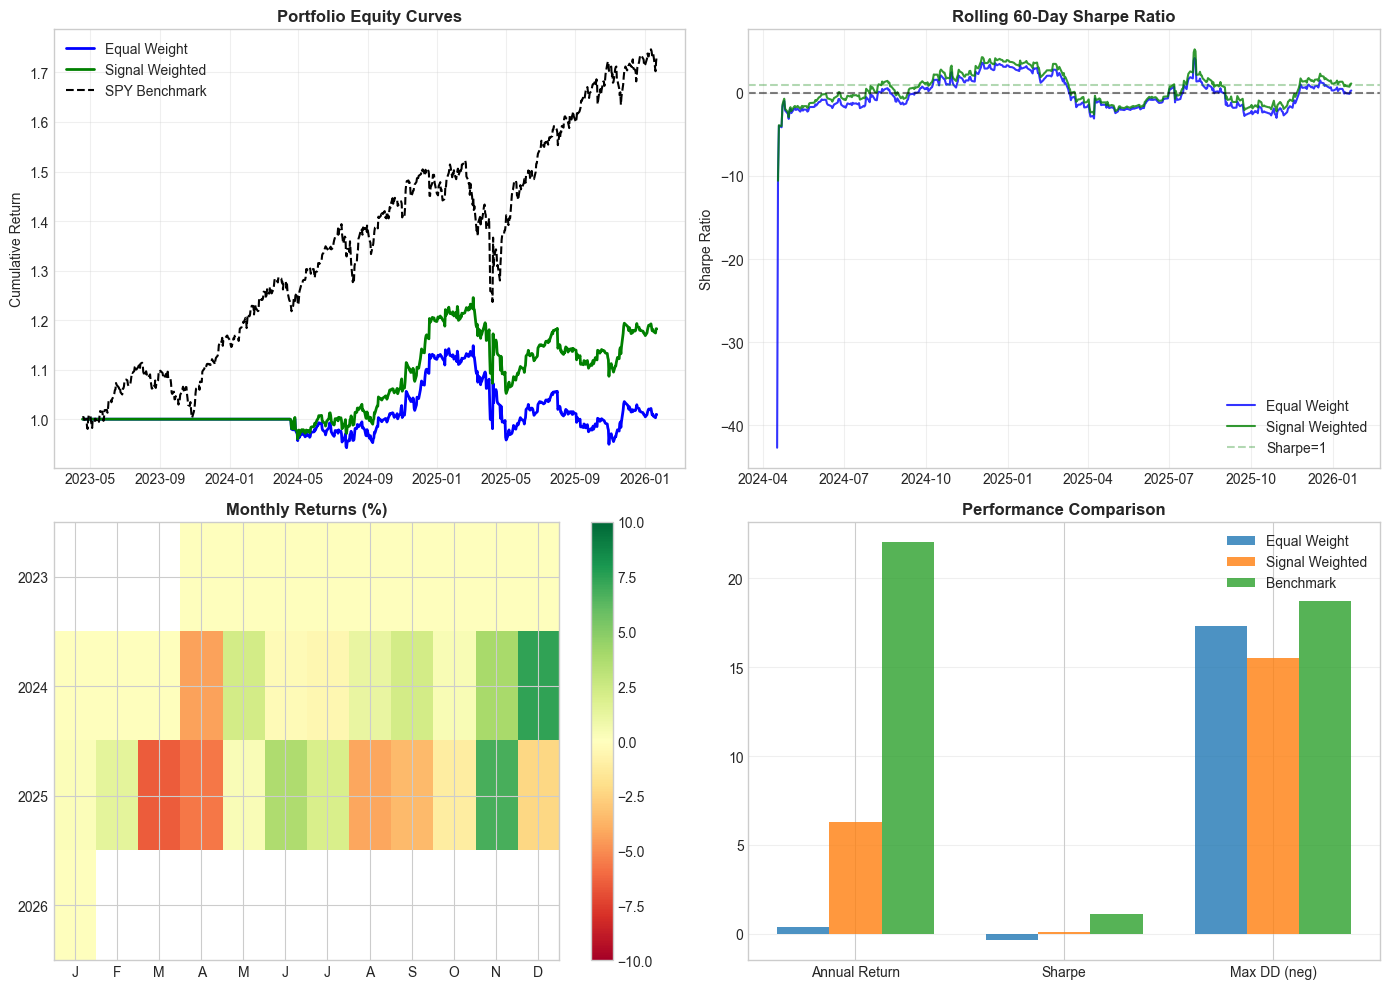

In [8]:
# ============================================================
# PORTFOLIO VISUALIZATION
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Portfolio Equity Curves
ax1 = axes[0, 0]
eq_equity = (1 + portfolio['equal_weight']).cumprod()
signal_equity = (1 + portfolio['signal_weighted']).cumprod()
bench_port = (1 + returns[BENCHMARK].loc[portfolio['index']]).cumprod()

ax1.plot(eq_equity, 'b-', label='Equal Weight', linewidth=2)
ax1.plot(signal_equity, 'g-', label='Signal Weighted', linewidth=2)
ax1.plot(bench_port, 'k--', label='SPY Benchmark', linewidth=1.5)
ax1.set_title('Portfolio Equity Curves', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cumulative Return')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Rolling Sharpe Ratio
ax2 = axes[0, 1]
window = 60
rolling_sharpe_eq = (portfolio['equal_weight'].rolling(window).mean() * 252 - RISK_FREE_RATE) / (portfolio['equal_weight'].rolling(window).std() * np.sqrt(252))
rolling_sharpe_signal = (portfolio['signal_weighted'].rolling(window).mean() * 252 - RISK_FREE_RATE) / (portfolio['signal_weighted'].rolling(window).std() * np.sqrt(252))

ax2.plot(rolling_sharpe_eq, 'b-', label='Equal Weight', alpha=0.8)
ax2.plot(rolling_sharpe_signal, 'g-', label='Signal Weighted', alpha=0.8)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.axhline(y=1, color='g', linestyle='--', alpha=0.3, label='Sharpe=1')
ax2.set_title(f'Rolling {window}-Day Sharpe Ratio', fontsize=12, fontweight='bold')
ax2.set_ylabel('Sharpe Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Monthly Returns Heatmap (Equal Weight)
ax3 = axes[1, 0]
monthly_returns = portfolio['equal_weight'].resample('M').sum()
monthly_df = pd.DataFrame({
    'Year': monthly_returns.index.year,
    'Month': monthly_returns.index.month,
    'Return': monthly_returns.values
})
pivot = monthly_df.pivot_table(values='Return', index='Year', columns='Month', aggfunc='sum')
im = ax3.imshow(pivot.values * 100, cmap='RdYlGn', aspect='auto', vmin=-10, vmax=10)
ax3.set_yticks(range(len(pivot.index)))
ax3.set_yticklabels(pivot.index)
ax3.set_xticks(range(12))
ax3.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
ax3.set_title('Monthly Returns (%)', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax3)

# 4. Performance Summary Bar
ax4 = axes[1, 1]
metrics_names = ['Annual Return', 'Sharpe', 'Max DD (neg)']
eq_vals = [port_metrics_eq['annual_return']*100, port_metrics_eq['sharpe'], -port_metrics_eq['max_drawdown']*100]
signal_vals = [port_metrics_signal['annual_return']*100, port_metrics_signal['sharpe'], -port_metrics_signal['max_drawdown']*100]
bench_vals = [bench_metrics['annual_return']*100, bench_metrics['sharpe'], -bench_metrics['max_drawdown']*100]

x = np.arange(len(metrics_names))
width = 0.25
ax4.bar(x - width, eq_vals, width, label='Equal Weight', alpha=0.8)
ax4.bar(x, signal_vals, width, label='Signal Weighted', alpha=0.8)
ax4.bar(x + width, bench_vals, width, label='Benchmark', alpha=0.8)
ax4.set_xticks(x)
ax4.set_xticklabels(metrics_names)
ax4.set_title('Performance Comparison', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [9]:
# ============================================================
# CURRENT TRADING SIGNALS
# ============================================================

print("\n📊 CURRENT TRADING SIGNALS")
print("=" * 80)

current_signals = {}
for ticker in TICKERS:
    signal = backtest_results[ticker]['signals'].iloc[-1]
    
    # Get feature values for context
    df = feature_dfs[ticker]
    rsi = df['rsi'].iloc[-1]
    macd = df['macd'].iloc[-1]
    bb_pos = df['bb_position'].iloc[-1]
    
    if signal == 1:
        action = 'LONG'
        emoji = '📈'
    elif signal == -1:
        action = 'SHORT'
        emoji = '📉'
    else:
        action = 'FLAT'
        emoji = '⚪'
    
    current_signals[ticker] = {
        'signal': signal,
        'action': action,
        'rsi': rsi,
        'macd': macd * 100,
        'bb_position': bb_pos
    }

print(f"\n{'Ticker':<10} {'Signal':>10} {'RSI':>10} {'MACD%':>10} {'BB Pos':>10}")
print("-" * 80)
for ticker, data in current_signals.items():
    emoji = '📈' if data['action'] == 'LONG' else ('📉' if data['action'] == 'SHORT' else '⚪')
    print(f"{ticker:<10} {emoji} {data['action']:<6} {data['rsi']:>9.1f} {data['macd']:>9.3f} {data['bb_position']:>9.2f}")


📊 CURRENT TRADING SIGNALS

Ticker         Signal        RSI      MACD%     BB Pos
--------------------------------------------------------------------------------
AAPL       ⚪ FLAT         9.4    -2.303     -0.95
MSFT       ⚪ FLAT        20.4    -1.959     -1.16
GOOGL      ⚪ FLAT        65.0     1.900      0.39
AMZN       ⚪ FLAT        48.7     0.656     -0.38
META       ⚪ FLAT        27.1    -1.709     -0.79


In [10]:
# ============================================================
# FINAL RECOMMENDATIONS
# ============================================================

print("\n" + "=" * 80)
print("📊 WEEK 12: COMPLETE TRADING SYSTEM - FINAL RECOMMENDATIONS")
print("=" * 80)

# Best individual strategy
best_ticker = max(all_metrics, key=lambda x: all_metrics[x]['sharpe'])
best_sharpe = all_metrics[best_ticker]['sharpe']

print(f"\n🏆 STRATEGY PERFORMANCE SUMMARY:")
print(f"\n   Best Individual Strategy: {best_ticker}")
print(f"   Sharpe Ratio: {best_sharpe:.2f}")
print(f"   Total Return: {all_metrics[best_ticker]['total_return']:.2%}")

print(f"\n   Portfolio (Equal Weight):")
print(f"   Sharpe Ratio: {port_metrics_eq['sharpe']:.2f}")
print(f"   Total Return: {port_metrics_eq['total_return']:.2%}")
print(f"   Max Drawdown: {port_metrics_eq['max_drawdown']:.2%}")

# Current positions
print(f"\n📊 CURRENT POSITION RECOMMENDATIONS:")
longs = [t for t in TICKERS if current_signals[t]['action'] == 'LONG']
shorts = [t for t in TICKERS if current_signals[t]['action'] == 'SHORT']
flats = [t for t in TICKERS if current_signals[t]['action'] == 'FLAT']

print(f"   📈 LONG:  {longs if longs else 'None'}")
print(f"   📉 SHORT: {shorts if shorts else 'None'}")
print(f"   ⚪ FLAT:  {flats if flats else 'None'}")

# Position sizing
print(f"\n💰 SUGGESTED POSITION SIZING (${INITIAL_CAPITAL:,}):")
for ticker in TICKERS:
    if current_signals[ticker]['action'] == 'LONG':
        position = INITIAL_CAPITAL * MAX_POSITION_SIZE
        print(f"   {ticker}: LONG ${position:,.0f} ({MAX_POSITION_SIZE:.0%})")
    elif current_signals[ticker]['action'] == 'SHORT':
        position = INITIAL_CAPITAL * MAX_POSITION_SIZE
        print(f"   {ticker}: SHORT ${position:,.0f} ({MAX_POSITION_SIZE:.0%})")

# Risk warning
print(f"\n⚠️ RISK MANAGEMENT:")
print(f"   • Max Position Size: {MAX_POSITION_SIZE:.0%} per stock")
print(f"   • Transaction Cost Assumption: {TRANSACTION_COST:.2%}")
print(f"   • Backtest Period: ~{LOOKBACK_DAYS//252} years")
print(f"   • Walk-Forward Windows: 252-day train, 21-day test")

print("\n" + "=" * 80)
print("📚 THIS NOTEBOOK INTEGRATES ALL CONCEPTS FROM WEEKS 1-12:")
print("   • Foundation, Statistics, Time Series (Weeks 1-3)")
print("   • ML Models, Portfolio Optimization, Factor Models (Weeks 4-6)")
print("   • Volatility, Instance-Based, Unsupervised (Weeks 7-9)")
print("   • Time Series ML, Feature Engineering (Weeks 10-11)")
print("   • Professional Backtesting Framework (Week 12)")
print("=" * 80)
print("⚠️ DISCLAIMER: Educational purposes only. Not financial advice!")
print("=" * 80)


📊 WEEK 12: COMPLETE TRADING SYSTEM - FINAL RECOMMENDATIONS

🏆 STRATEGY PERFORMANCE SUMMARY:

   Best Individual Strategy: GOOGL
   Sharpe Ratio: 0.04
   Total Return: 17.38%

   Portfolio (Equal Weight):
   Sharpe Ratio: -0.37
   Total Return: 0.96%
   Max Drawdown: -17.33%

📊 CURRENT POSITION RECOMMENDATIONS:
   📈 LONG:  None
   📉 SHORT: None
   ⚪ FLAT:  ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']

💰 SUGGESTED POSITION SIZING ($100,000):

⚠️ RISK MANAGEMENT:
   • Max Position Size: 20% per stock
   • Transaction Cost Assumption: 0.10%
   • Backtest Period: ~3 years
   • Walk-Forward Windows: 252-day train, 21-day test

📚 THIS NOTEBOOK INTEGRATES ALL CONCEPTS FROM WEEKS 1-12:
   • Foundation, Statistics, Time Series (Weeks 1-3)
   • ML Models, Portfolio Optimization, Factor Models (Weeks 4-6)
   • Volatility, Instance-Based, Unsupervised (Weeks 7-9)
   • Time Series ML, Feature Engineering (Weeks 10-11)
   • Professional Backtesting Framework (Week 12)
⚠️ DISCLAIMER: Educational purpose

---

## 📚 Complete Concepts Used (Weeks 1-12)

| Week | Concept | Application |
|------|---------|-------------|
| 1 | Returns, Volatility | Feature engineering |
| 2 | Statistics | Hypothesis testing |
| 3 | Time Series | GARCH, stationarity |
| 4 | ML Regression | Return prediction |
| 5 | Portfolio Optimization | Position sizing |
| 6 | Factor Models | Risk decomposition |
| 7 | Advanced Volatility | Vol targeting |
| 8 | Instance-Based | KNN signals |
| 9 | Unsupervised | Regime detection |
| 10 | Advanced TS | VAR, cointegration |
| 11 | Feature Engineering | Comprehensive features |
| **12** | **Backtesting** | **Complete system** |
| **12** | **Walk-Forward** | **No look-ahead** |
| **12** | **Transaction Costs** | **Realistic returns** |
| **12** | **Risk Management** | **Position limits** |

---

## 🎓 Congratulations!

You've completed the 12-week quantitative trading ML curriculum!

**What you've built:**
- Complete feature engineering pipeline
- Multiple ML model integrations
- Professional backtesting framework
- Risk-adjusted position sizing
- Real-time trading signals

**Next steps:**
- Paper trade with these signals
- Add more sophisticated models
- Explore options strategies
- Consider alternative data sources

---